# Supervised Learning: Classification Algorithms Introduction

In this practical assignment, we will explore supervised learning, focusing on classification problems. We'll apply different learning algorithms, compare their performance using evaluation metrics, and analyze the time spent to train and test the models.

Key steps include:
1. Dataset analysis and pre-processing.
3. Defining training and test sets.
4. Selecting and parameterizing learning algorithms, choosing at least three from Decision Trees, Neural Networks, K-NN, SVM, etc.
5. Evaluating the learning process on the test set.

We'll use pandas to pre-process the dataset, scikit-learn for implementing algorithms, and seaborn for visualization.

## Dataset

We'll use the [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) from the UCI Machine Learning Repository.

From the dataset description:
> The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

As presented in the slides, we will try to answer some questions:
* Will a particular session lead to a purchase?
* Which features are most/least indicative of a purchase?
* What users are more/less likely to purchase?


## Pre-processing

We'll start by loading the dataset `online_shoppers_intention.csv` using pandas.

In [1]:
import pandas

data = pandas.read_csv('online_shoppers_intention.csv')

# check if there are any null values
print("Any null values? ", data.isnull().values.any())

# check if there are any missing values
print("Any missing values? ", data.isna().values.any())

data.head()

Any null values?  False
Any missing values?  False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Let's try to plot some of the features to get a better understanding of the dataset.

As previously mentioned, we'll use seaborn for visualization. We'll start with a simple correlation bar plot with the target variable `Revenue`.

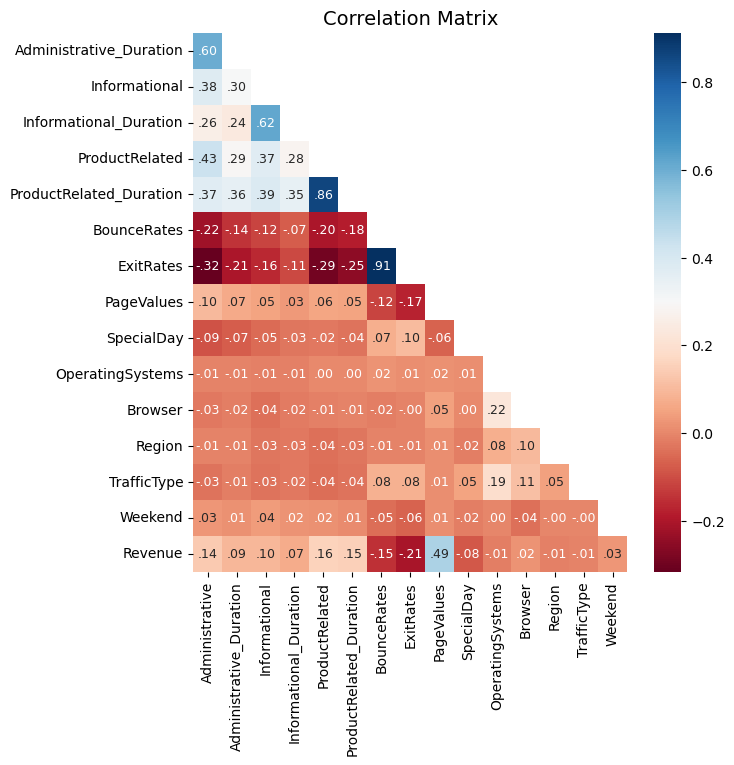

In [3]:
import seaborn
import numpy as np

%matplotlib inline

def plot_correlation_matrix(data):
    corr_matrix = data.corr(numeric_only=True)

    # drop first row and last column
    corr_matrix = corr_matrix.iloc[1:, :-1]

    # only show the lower triangle of the matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1) # k=1 to remove the diagonal

    # this is just to make the numbers more compact by removing the leading zeros
    annot = np.array([['' if m else f"{corr_matrix.iloc[i, j]:.2f}".lstrip('0').replace('-0','-') for j, m in enumerate(row)] for i, row in enumerate(mask)])

    hm = seaborn.heatmap(corr_matrix, mask=mask, cmap='RdBu', annot=annot, fmt='', annot_kws={'size': 9})
    hm.figure.set_size_inches(7, 7)
    hm.set_title('Correlation Matrix', fontsize=14)

plot_correlation_matrix(data)

As we can see, `Revenue` is mostly correlated with `PageValues` and `ProductRelated` features, it is also very negatively correlated with `BounceRates` and `ExitRates`, which is to be expected.

In fact, we can see that `BounceRates` and `ExitRates` are highly correlated, so we can drop one of them. We'll drop `BounceRates` since it is more negatively correlated with `Revenue`.

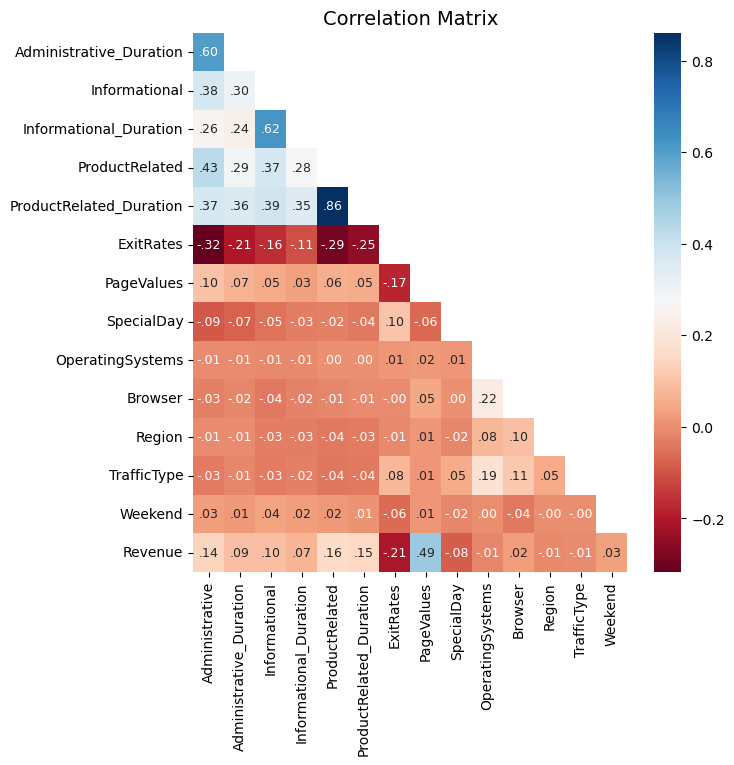

In [4]:
data_filtered = data.drop(columns=['BounceRates'])

# check correlation matrix again
plot_correlation_matrix(data_filtered)

Before we start training our models, we'll need to convert the categorical features to numerical values.

In [5]:
# check if there are any invalid month values
print(data_filtered['Month'].unique())

# convert `June` to `Jun` otherwise pandas will not be able to convert it to a numeric value
data_filtered['Month'] = data_filtered['Month'].replace('June', 'Jun')

# convert `Month` to a numeric value
data_filtered['Month'] = pandas.to_datetime(data_filtered['Month'], format='%b').dt.month

# convert `VisitorType` to a numeric value using `get_dummies`
data_filtered = pandas.get_dummies(data_filtered, columns=['VisitorType'])

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


Now we arrive at machine learning. We'll start by splitting the dataset into training and test sets.

We'll use `GridSearchCV` to find the best parameters for each algorithm. We'll use 5-fold cross-validation to evaluate the performance of each algorithm.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def grid_search(model, params, X, y):
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid.fit(X, y)
    return grid

X = data_filtered.drop(columns=['Revenue'])
y = data_filtered['Revenue']


params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [None, 'sqrt', 'log2']
}

grid = grid_search(DecisionTreeClassifier(), params, X, y)

print("Best score: ", grid.best_score_)
print("Best params: ", grid.best_params_)


Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best score:  0.8877534468775344
Best params:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4}
